Write a program to do following:  
Data Set: https://www.kaggle.com/shwetabh123/mall-customers 
This dataset givesthe data of Income and money spent by the customers visiting a shopping  mall. 
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore,  asa mall owner you need to find the group of people who are the profitable customers for the  mallowner. Apply at least two clustering algorithms (based on Spending Score) to find the  group ofcustomers. 
a) Apply Data pre-processing  
b) Perform data-preparation (Train-Test Split) 
c) Apply Machine Learning Algorithm
d) Evaluate Model. 
e) Apply Cross-Validation and Evaluate Mode 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score


In [4]:


df = pd.read_csv("../datasets/Mall_Customers.csv")

# Drop CustomerID, convert Gender
df.drop("CustomerID", axis=1, inplace=True)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # feature selection
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_


In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_


In [8]:
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))


KMeans Silhouette Score: 0.5529848387913663
DBSCAN Silhouette Score: 0.3559722149386559


In [9]:
def cross_val_cluster_score(model, data, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for _, test_idx in kf.split(data):
        subset = data.iloc[test_idx]
        scaled = StandardScaler().fit_transform(subset)
        model.fit(scaled)
        labels = model.labels_ if hasattr(model, 'labels_') else model.predict(scaled)
        score = silhouette_score(scaled, labels)
        scores.append(score)
    return np.mean(scores)


In [10]:
print("KMeans CV Silhouette:", cross_val_cluster_score(KMeans(n_clusters=5), X))
print("DBSCAN CV Silhouette:", cross_val_cluster_score(DBSCAN(eps=0.5, min_samples=5), X))


KMeans CV Silhouette: 0.5414447801026893
DBSCAN CV Silhouette: 0.2742734070431985


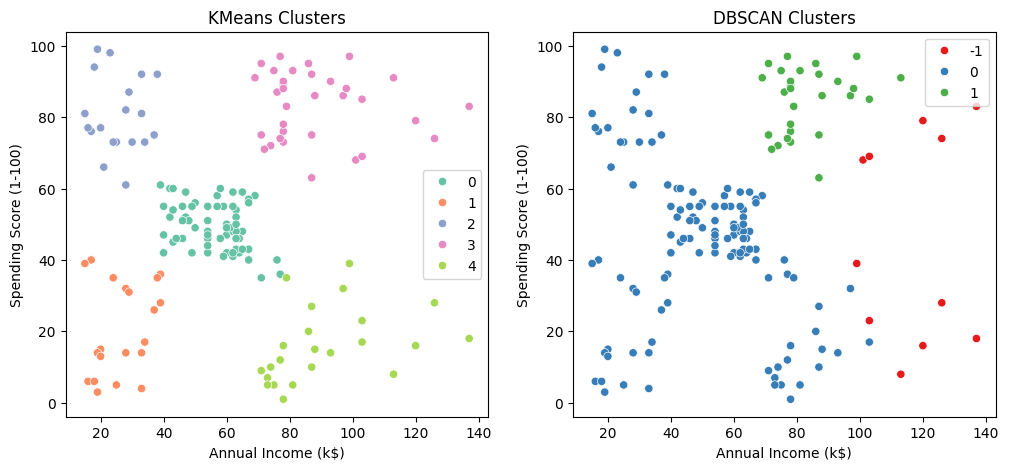

In [11]:
plt.figure(figsize=(12, 5))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train['Annual Income (k$)'], y=X_train['Spending Score (1-100)'], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clusters")

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train['Annual Income (k$)'], y=X_train['Spending Score (1-100)'], hue=dbscan_labels, palette='Set1')
plt.title("DBSCAN Clusters")

plt.show()
